In [5]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)
data.columns = ['Total', 'East', 'West']
#if Total is not resent
#data.columns = ['West', 'East']
#data['Total'] = data.eval('West + East')

data.head() #prints the top rows



C:\Users\user\AppData\Local\Temp\ipykernel_17468\1894549831.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)


,Total,East,West
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


In [6]:
#pip install --user matplotlib

              Total          East          West
count  97798.000000  97798.000000  97798.000000
mean     106.420949     46.968343     59.452606
std      132.861905     59.779567     82.932039
min        0.000000      0.000000      0.000000
25%       13.000000      6.000000      7.000000
50%       59.500000     27.000000     31.000000
75%      144.000000     65.000000     77.000000
max     1097.000000    698.000000    850.000000


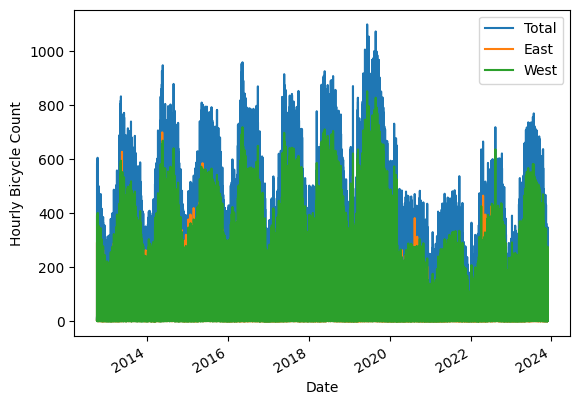

In [7]:
print(data.dropna().describe())
data.plot()
plt.ylabel('Hourly Bicycle Count');

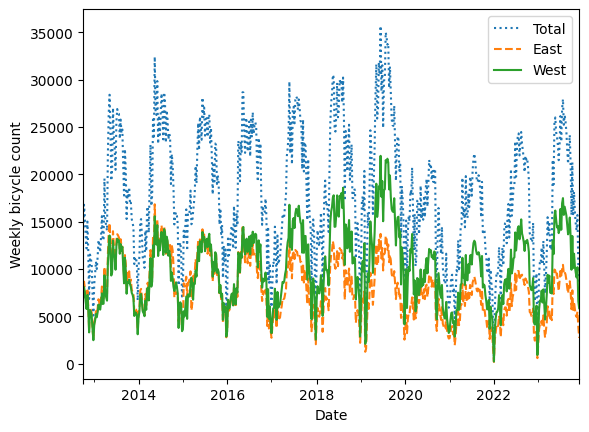

In [8]:
weekly = data.resample('W').sum()
#weekly.plot()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

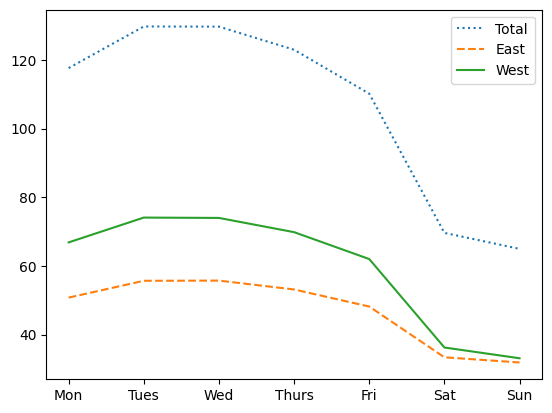

In [9]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']); #style of lines

<Axes: title={'center': 'Weekends'}, xlabel='time'>

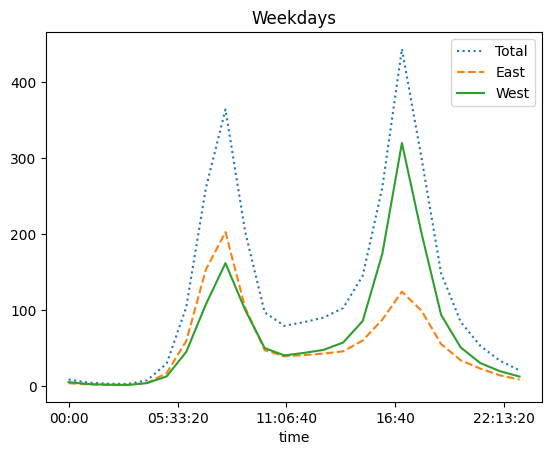

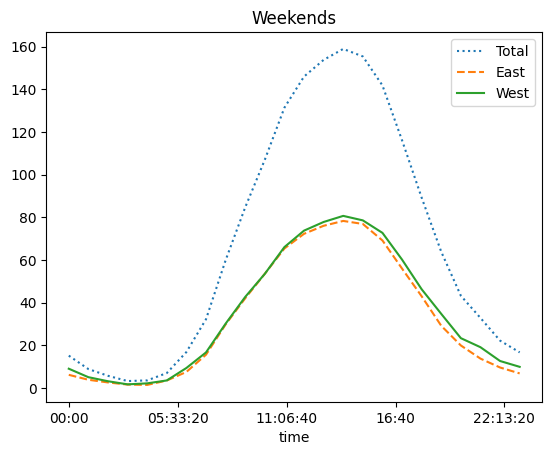

In [10]:
import numpy as np
weekend_array = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend_array, data.index.time]).mean()

#print(weekend_array)
#print(by_time)

by_time.loc['Weekday'].plot(title='Weekdays', style=[':', '--', '-'])
by_time.loc['Weekend'].plot(title='Weekends', style=[':', '--', '-'])

#fig, ax = plt.subplots(1, 2, figsize=(14, 5))
#by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays', style=[':', '--', '-'])
#by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends', style=[':', '--', '-'])